## ADS1 Assignment 1

#### Tanvir Ahmed, 20075186

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_excel_file(filename):
    """This function reads a MS Excel file and loads data to a pandas dataframe.
    Filename should be enclosed in quotes 'filename' when passing in the function.
    """
    dataframe = pd.read_excel(filename)
    return(dataframe)

In [3]:
df = read_excel_file('Petrol prices - UK and some EU countries - updated.xlsx')

In [4]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 
              'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 
              'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

month_number = df.Month.map(month_dict)

In [5]:
df.insert(2, 'Month number', month_number, False)
df2 = df.drop(['Month'], axis=1)

In [6]:
df_mean = df2.groupby(['Year']).mean()
df_max = df2.drop(['Month number'], axis=1).groupby(['Year']).max()
df_min = df2.drop(['Month number'], axis=1).groupby(['Year']).min()

In [7]:
#Creating numpy arrays of highest and lowest petrol for selected years

max_array_2021 = df_max.loc[2021].to_numpy()
min_array_2021 = df_min.loc[2021].to_numpy()

max_array_2020 = df_max.loc[2020].to_numpy()
max_array_2019 = df_max.loc[2019].to_numpy()
max_array_2009 = df_max.loc[2009].to_numpy()
max_array_2008 = df_max.loc[2008].to_numpy()
max_array_2007 = df_max.loc[2007].to_numpy()

max_array_1999 = df_max.loc[1999].to_numpy()
max_array_1999 = df_min.loc[1999].to_numpy()

In [8]:
countries = np.array(['Austria', 'Belgium', 'Denmark', 'Finland', 
                    'France', 'Germany', 'Greece', 'Ireland', 
                    'Italy', 'Luxembourg', 'Netherlands', 'Portugal',
                    'Spain', 'Sweden', 'United Kingdom'])

In [9]:
def bar_chart(Country_list, max_list, min_list):
    """This function plots a bar graph.
    Requires 3 input.
    """
    plt.figure(figsize=(8, 6))
    
    plt.bar(Country_list, max_list, alpha=0.8, label='highest price', 
            color='tab:orange', edgecolor='black')
    plt.bar(Country_list, min_list, alpha=0.8, label='lowest price', 
            color='deepskyblue', edgecolor='black')
    plt.xlabel("Countries")
    plt.ylabel("Price (pence/litre)")
    plt.title("Highest and lowest petrol prices in countries in 2021")

    plt.legend()

    plt.xticks(rotation=45, ha='right') # To make the xlabels visible properly 

    plt.savefig('Countries.png', dpi=600, bbox_inches='tight')
    plt.show()  
    return()

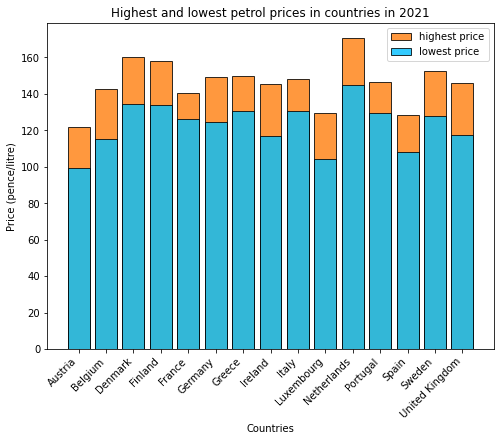

()

In [10]:
# Comparing the prices in 2021
bar_chart(countries, max_array_2021, min_array_2021)

In [11]:
def box_plot(arr1, arr2):
    """This function plots a box plot.
    list1 and list2 must have equal number of elements.
    list is a list of strings.
    """
    plt.figure(figsize=(8, 6))

    plt.boxplot(arr1, labels=arr2)

    plt.xlabel("Year")
    plt.ylabel("Price (pence/litre)")
    plt.title("Highest petrol prices in countries")

    plt.savefig('Boxplot.png', dpi=600)
    plt.show()
    return()

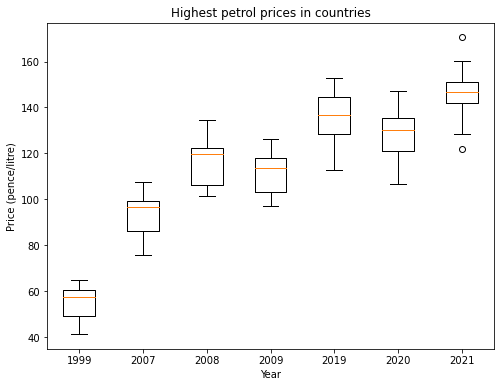

()

In [12]:
max_prices_in_year = [max_array_1999, max_array_2007, max_array_2008, 
                   max_array_2009, max_array_2019, max_array_2020, 
                   max_array_2021] 
year_string = ['1999', '2007', '2008', '2009', 
               '2019', '2020', '2021']

box_plot(max_prices_in_year, year_string)

In [13]:
def scatter_plot(country_dataframe, country):
    """This function plots a scatter plot.
    country_dataframe must be a dataframe containing 3 columns:
    Year, Month number and Country.
    country takes string input, within single quotes; eg. input: 'Germany' 
    """
    plt.figure(figsize=(8, 6))
    petrol_price_country = country_dataframe.iloc[:, 2]
    year = country_dataframe.iloc[:, 0]
    year_month = country_dataframe.iloc[:, 1]
    
    plt.xlabel("Year")
    plt.ylabel("Price (pence/litre)")
    
    title_for_plot = str(country + " Petrol Prices")
    plt.title(title_for_plot)

    plt.scatter(year, petrol_price_country, c=year_month, cmap='cool')
    plt.colorbar().ax.set_title('Months',fontsize=10)


    plt.savefig('country_prices.png', dpi=720)

    plt.show()
    return()

In [14]:
#dataframe containing UK prices data in the desired format for the scatter plot function

df_UK = df2.iloc[:, [0, 1, 16]]
df_UK.head()

,Year,Month number,United Kingdom
0,1999,1,62.90
1,1999,2,63.02
2,1999,3,66.51
3,1999,4,70.20
4,1999,5,70.04


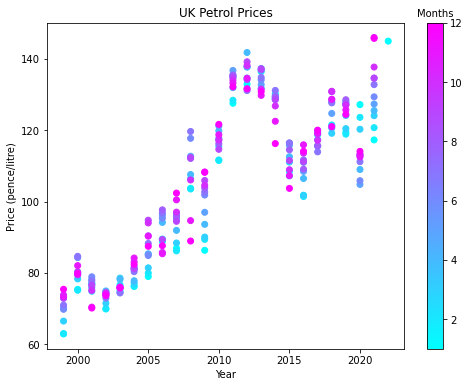

()

In [15]:
scatter_plot(df_UK, 'UK')

In [18]:
def scatter_plot_month(country_dataframe, country):
    """This function plots a scatter plot.
    country_dataframe must be a dataframe containing 3 columns:
    Year, Month number and Country.
    country takes string input, within single quotes; eg. input: 'Germany'
    """
    plt.figure(figsize=(8, 6))
    
    petrol_price_country = country_dataframe.iloc[:, 2]
    year = country_dataframe.iloc[:, 0]
    year_month = country_dataframe.iloc[:, 1]
    
    title_for_plot = str(country + " Petrol Prices")
    
    plt.xlabel("Year")
    plt.ylabel("Price (pence/litre)")
    plt.title(title_for_plot)

    plt.scatter(year_month, petrol_price_country, c=year, cmap='tab20')
    plt.colorbar().ax.set_title('Years',fontsize=10)


    plt.savefig('country_prices.png', dpi=720)

    plt.show()
    return()

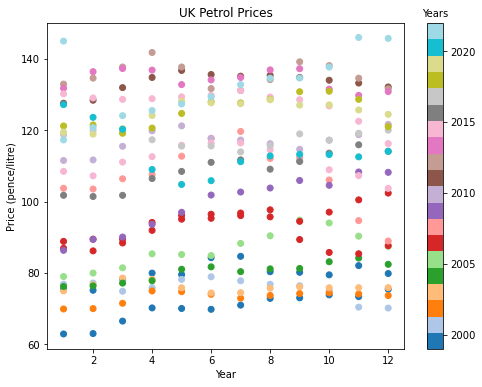

()

In [19]:
scatter_plot_month(df_UK, 'UK')

### ------------------------------------------------------------------------------------------------------------